# **Project: Assessing the Impact of COVID-19 on U.S. Airports**

# **0. Load Dependencies**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df_2019_airports = pd.read_csv("2019_airport_data.csv", index_col=0)

df_2020_airports = pd.read_csv("2020_airport_data.csv", index_col=0)

In [3]:
df_2019_airports.shape, df_2020_airports.shape

((350, 17), (349, 17))

In [4]:
df_2019_airports[~df_2019_airports['airport'].isin(df_2020_airports['airport'])]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
30,BFM,"Mobile, AL: Mobile Downtown",12.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,BQN,"Aguadilla, PR: Rafael Hernandez",210.0,69.0,26.50,1.42,10.13,0.71,30.24,1.0,0.0,4477.0,1603.0,159.0,477.0,89.0,2149.0
87,DBQ,"Dubuque, IA: Dubuque Regional",89.0,23.0,6.14,2.83,5.71,0.00,8.33,6.0,0.0,1101.0,268.0,124.0,205.0,0.0,504.0
94,DRT,"Del Rio, TX: Del Rio International",62.0,7.0,0.55,0.07,0.44,0.00,5.95,0.0,0.0,385.0,28.0,8.0,7.0,0.0,342.0
153,HVN,"New Haven, CT: Tweed New Haven",84.0,15.0,2.39,1.00,3.98,0.00,7.63,2.0,3.0,824.0,149.0,40.0,106.0,0.0,529.0
218,MMH,"Mammoth Lakes, CA: Mammoth Lakes Airport",57.0,11.0,6.71,0.00,0.10,0.00,4.19,11.0,1.0,1580.0,1024.0,0.0,12.0,0.0,544.0
240,ORH,"Worcester, MA: Worcester Regional",121.0,38.0,15.87,0.00,7.98,0.00,14.15,1.0,2.0,3160.0,1624.0,0.0,321.0,0.0,1215.0
250,PGV,"Greenville, NC: Pitt Greenville",2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,PPG,"Pago Pago, TT: Pago Pago International",11.0,1.0,0.00,0.00,0.00,1.00,0.00,0.0,0.0,22.0,0.0,0.0,0.0,22.0,0.0
265,PSE,"Ponce, PR: Mercedita",87.0,33.0,10.38,0.17,7.77,0.28,14.41,0.0,3.0,2307.0,590.0,8.0,439.0,17.0,1253.0


In [5]:
df_2020_airports[~df_2020_airports['airport'].isin(df_2019_airports['airport'])]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5,ACK,"Nantucket, MA: Nantucket Memorial",12.0,4.0,2.12,0.00,0.00,0.00,1.88,1.0,0.0,222.0,147.0,0.0,0.0,0.0,75.0
15,ALS,"Alamosa, CO: San Luis Valley Regional/Bergman ...",53.0,3.0,2.00,1.00,0.00,0.00,0.00,1.0,1.0,295.0,63.0,232.0,0.0,0.0,0.0
58,CDB,"Cold Bay, AK: Cold Bay Airport",18.0,9.0,0.70,1.37,2.74,1.31,2.88,1.0,1.0,405.0,37.0,39.0,126.0,36.0,167.0
89,DDC,"Dodge City, KS: Dodge City Regional",53.0,8.0,4.00,1.00,0.00,0.00,3.00,0.0,0.0,315.0,73.0,42.0,0.0,0.0,200.0
90,DEC,"Decatur, IL: Decatur Airport",53.0,5.0,2.00,0.00,0.00,0.00,3.00,1.0,0.0,382.0,72.0,0.0,0.0,0.0,310.0
94,DIK,"Dickinson, ND: Dickinson - Theodore Roosevelt ...",30.0,7.0,6.00,0.00,0.00,0.00,1.00,0.0,0.0,322.0,266.0,0.0,0.0,0.0,56.0
175,JST,"Johnstown, PA: John Murtha Johnstown-Cambria C...",51.0,7.0,7.00,0.00,0.00,0.00,0.00,4.0,0.0,404.0,404.0,0.0,0.0,0.0,0.0
277,RIW,"Riverton/Lander, WY: Riverton Regional",45.0,1.0,0.00,0.00,1.00,0.00,0.00,2.0,2.0,699.0,0.0,0.0,699.0,0.0,0.0
302,SHR,"Sheridan, WY: Sheridan County",53.0,5.0,3.00,0.00,0.00,0.00,2.00,0.0,1.0,273.0,171.0,0.0,0.0,0.0,102.0
340,VCT,"Victoria, TX: Victoria Regional",53.0,6.0,4.00,1.00,0.00,0.00,1.00,2.0,0.0,1760.0,1614.0,58.0,0.0,0.0,88.0


# **1. Delay Rate Analysis**

## **1.1 Year 2019**

In [16]:
df_2019_airports

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",356.0,60.0,22.68,3.82,13.38,0.00,20.13,2.0,1.0,3464.0,1559.0,162.0,497.0,0.0,1246.0
1,ABI,"Abilene, TX: Abilene Regional",195.0,32.0,11.58,0.60,8.79,0.00,11.02,1.0,0.0,1563.0,459.0,21.0,257.0,0.0,826.0
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",2051.0,438.0,164.31,8.41,56.22,0.31,208.76,11.0,2.0,22646.0,9254.0,350.0,1889.0,17.0,11136.0
3,ABR,"Aberdeen, SD: Aberdeen Regional",64.0,15.0,2.94,3.41,4.45,0.00,4.19,2.0,1.0,2466.0,153.0,502.0,265.0,0.0,1546.0
4,ABY,"Albany, GA: Southwest Georgia Regional",81.0,11.0,5.91,1.00,0.71,0.00,3.38,0.0,0.0,1244.0,890.0,43.0,39.0,0.0,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,WRG,"Wrangell, AK: Wrangell Airport",60.0,16.0,4.53,0.60,5.63,0.00,5.24,1.0,1.0,646.0,181.0,9.0,154.0,0.0,302.0
346,XNA,"Fayetteville, AR: Northwest Arkansas Regional",1137.0,206.0,58.37,7.58,57.31,0.00,82.75,8.0,7.0,13312.0,4149.0,1070.0,2378.0,0.0,5715.0
347,XWA,"Williston, ND: Williston Basin International",79.0,17.0,5.76,0.35,2.76,0.79,7.35,1.0,5.0,1701.0,519.0,37.0,98.0,15.0,1032.0
348,YAK,"Yakutat, AK: Yakutat Airport",60.0,12.0,1.00,0.89,1.58,0.00,8.52,2.0,1.0,767.0,28.0,51.0,55.0,0.0,633.0


In [ ]:
df_2019_airports['delay_rate'] = df_2019_airports['arr_del15'] / df_2019_airports['arr_flights']
df_2019_airports['carrier_rate'] = df_2019_airports['carrier_ct'] / df_2019_airports['arr_del15']
df_2019_airports['weather_rate'] = df_2019_airports['weather_ct'] / df_2019_airports['arr_del15']
df_2019_airports['nas_rate'] = df_2019_airports['nas_ct'] / df_2019_airports['arr_del15']
df_2019_airports['late_aircraft_rate'] = df_2019_airports['late_aircraft_ct'] / df_2019_airports['arr_del15']

df_2019_airports.head()

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",356.0,60.0,22.68,3.82,13.38,0.00,20.13,2.0,...,1559.0,162.0,497.0,0.0,1246.0,0.168539,0.378000,0.063667,0.223000,0.335500
1,ABI,"Abilene, TX: Abilene Regional",195.0,32.0,11.58,0.60,8.79,0.00,11.02,1.0,...,459.0,21.0,257.0,0.0,826.0,0.164103,0.361875,0.018750,0.274687,0.344375
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",2051.0,438.0,164.31,8.41,56.22,0.31,208.76,11.0,...,9254.0,350.0,1889.0,17.0,11136.0,0.213554,0.375137,0.019201,0.128356,0.476621
3,ABR,"Aberdeen, SD: Aberdeen Regional",64.0,15.0,2.94,3.41,4.45,0.00,4.19,2.0,...,153.0,502.0,265.0,0.0,1546.0,0.234375,0.196000,0.227333,0.296667,0.279333
4,ABY,"Albany, GA: Southwest Georgia Regional",81.0,11.0,5.91,1.00,0.71,0.00,3.38,0.0,...,890.0,43.0,39.0,0.0,272.0,0.135802,0.537273,0.090909,0.064545,0.307273


In [ ]:
# missing values

df_2019_airports[df_2019_airports.isna().any(axis=1)]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
30,BFM,"Mobile, AL: Mobile Downtown",12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
250,PGV,"Greenville, NC: Pitt Greenville",2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
df_2019_airports = df_2019_airports.fillna(0.0)

df_2019_airports[df_2019_airports.isna().any(axis=1)]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate


### **1.1.1 Top 10 Highest Delay Rate Airports**

In [24]:
df_2019_airports.columns

Index(['airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_rate', 'carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate'],
      dtype='object')

In [26]:
df_2019_delay = df_2019_airports[['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate', 'carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate']].sort_values('delay_rate', ascending=False)

df_2019_delay

,airport,airport_name,arr_flights,arr_del15,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
74,COD,"Cody, WY: Yellowstone Regional",2.0,1.0,0.500000,1.000000,0.000000,0.000000,0.000000
341,USA,"Concord, NC: Concord Padgett Regional",129.0,54.0,0.418605,0.189630,0.000741,0.247407,0.555370
265,PSE,"Ponce, PR: Mercedita",87.0,33.0,0.379310,0.314545,0.005152,0.235455,0.436667
24,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",543.0,196.0,0.360958,0.168878,0.024592,0.322092,0.475969
73,CNY,"Moab, UT: Canyonlands Field",31.0,11.0,0.354839,0.363636,0.000000,0.234545,0.401818
...,...,...,...,...,...,...,...,...,...
58,CDC,"Cedar City, UT: Cedar City Regional",53.0,3.0,0.056604,0.666667,0.186667,0.000000,0.146667
140,GUM,"Guam, TT: Guam International",75.0,4.0,0.053333,0.182500,0.000000,0.132500,0.685000
80,CSG,"Columbus, GA: Columbus Airport",80.0,4.0,0.050000,0.750000,0.000000,0.250000,0.000000
30,BFM,"Mobile, AL: Mobile Downtown",12.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
df_2019_delay_top10 = df_2019_delay.head(10)

df_2019_delay_top10

,airport,airport_name,arr_flights,arr_del15,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
74,COD,"Cody, WY: Yellowstone Regional",2.0,1.0,0.500000,1.000000,0.000000,0.000000,0.000000
341,USA,"Concord, NC: Concord Padgett Regional",129.0,54.0,0.418605,0.189630,0.000741,0.247407,0.555370
265,PSE,"Ponce, PR: Mercedita",87.0,33.0,0.379310,0.314545,0.005152,0.235455,0.436667
24,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",543.0,196.0,0.360958,0.168878,0.024592,0.322092,0.475969
73,CNY,"Moab, UT: Canyonlands Field",31.0,11.0,0.354839,0.363636,0.000000,0.234545,0.401818
110,EWR,"Newark, NJ: Newark Liberty International",11571.0,4043.0,0.349408,0.133564,0.014440,0.643116,0.208709
241,OTH,"North Bend/Coos Bay, OR: Southwest Oregon Regi...",26.0,9.0,0.346154,0.204444,0.000000,0.035556,0.760000
300,SFO,"San Francisco, CA: San Francisco International",14038.0,4690.0,0.334093,0.145945,0.012640,0.593495,0.247567
243,OWB,"Owensboro, KY: Owensboro Daviess County Regional",9.0,3.0,0.333333,0.310000,0.226667,0.356667,0.106667
45,BQN,"Aguadilla, PR: Rafael Hernandez",210.0,69.0,0.328571,0.384058,0.020580,0.146812,0.438261


### **1.1.2 Where are they located?**

import location data

In [40]:
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']

df_location = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=columns)

df_location = df_location[["Name", 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude']]

df_location

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146
...,...,...,...,...,...,...,...,...
7693,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272
7694,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670
7695,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670


In [41]:
df_location = df_location[df_location.Country == 'United States']

df_location

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude
3212,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2
3213,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35
3214,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16
3215,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22
3216,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38
...,...,...,...,...,...,...,...,...
7637,Camp Pendleton MCAS (Munn Field) Airport,Oceanside,United States,\N,KNFG,33.301300,-117.355003,78
7651,Vidalia Regional Airport,Vidalia,United States,VDI,KVDI,32.192699,-82.371201,275
7652,Granbury Regional Airport,Granbury,United States,\N,KGDJ,32.444401,-97.816902,778
7653,Oswego County Airport,Fulton,United States,\N,KFZY,43.350800,-76.388100,475


In [44]:
df_2019_delay_top10_location = pd.merge(df_2019_delay_top10, df_location, left_on="airport", right_on="IATA", how = "left")

df_2019_delay_top10_location = df_2019_delay_top10_location[['airport', 'airport_name', 'Latitude', 'Longitude',
       'Altitude']]

In [45]:
df_2019_delay_top10_location

,airport,airport_name,Latitude,Longitude,Altitude
0,COD,"Cody, WY: Yellowstone Regional",44.520199,-109.024002,5102.0
1,USA,"Concord, NC: Concord Padgett Regional",35.387798,-80.709099,705.0
2,PSE,"Ponce, PR: Mercedita",NaN,NaN,NaN
3,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",33.307800,-111.654999,1382.0
4,CNY,"Moab, UT: Canyonlands Field",38.755001,-109.754997,4557.0
5,EWR,"Newark, NJ: Newark Liberty International",40.692501,-74.168701,18.0
6,OTH,"North Bend/Coos Bay, OR: Southwest Oregon Regi...",43.417099,-124.246002,17.0
7,SFO,"San Francisco, CA: San Francisco International",37.618999,-122.375000,13.0
8,OWB,"Owensboro, KY: Owensboro Daviess County Regional",37.740101,-87.166801,407.0
9,BQN,"Aguadilla, PR: Rafael Hernandez",NaN,NaN,NaN


In [47]:
df_2019_delay_top10_location.loc[9, ['Latitude', 'Longitude','Altitude']] = [18.495, -67.12944, 237.0]

df_2019_delay_top10_location.loc[2, ['Latitude', 'Longitude','Altitude']] = [18.0083, -66.5630, 29.0]

df_2019_delay_top10_location

,airport,airport_name,Latitude,Longitude,Altitude
0,COD,"Cody, WY: Yellowstone Regional",44.520199,-109.024002,5102.0
1,USA,"Concord, NC: Concord Padgett Regional",35.387798,-80.709099,705.0
2,PSE,"Ponce, PR: Mercedita",18.008300,-66.563000,29.0
3,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",33.307800,-111.654999,1382.0
4,CNY,"Moab, UT: Canyonlands Field",38.755001,-109.754997,4557.0
5,EWR,"Newark, NJ: Newark Liberty International",40.692501,-74.168701,18.0
6,OTH,"North Bend/Coos Bay, OR: Southwest Oregon Regi...",43.417099,-124.246002,17.0
7,SFO,"San Francisco, CA: San Francisco International",37.618999,-122.375000,13.0
8,OWB,"Owensboro, KY: Owensboro Daviess County Regional",37.740101,-87.166801,407.0
9,BQN,"Aguadilla, PR: Rafael Hernandez",18.495000,-67.129440,237.0


In [ ]:
# use plotly to plot the locations

figure_plotly_2019= px.scatter_geo(df_2019_delay_top10_location,
                                    lat='Latitude',
                                    lon='Longitude',
                                    hover_name='airport_name',
                                    text='airport',
                                    title='Top 10 U.S. Airports with Highest Delay Rates in 2019',
                                    projection='natural earth'
)

figure_plotly_2019.update_traces(marker=dict(size=10), textposition='middle right')

figure_plotly_2019.show()

## **1.2 Year 2020**

In [ ]:
df_2020_airports['delay_rate'] = df_2020_airports['arr_del15'] / df_2020_airports['arr_flights']
df_2020_airports['carrier_rate'] = df_2020_airports['carrier_ct'] / df_2020_airports['arr_del15']
df_2020_airports['weather_rate'] = df_2020_airports['weather_ct'] / df_2020_airports['arr_del15']
df_2020_airports['nas_rate'] = df_2020_airports['nas_ct'] / df_2020_airports['arr_del15']
df_2020_airports['late_aircraft_rate'] = df_2020_airports['late_aircraft_ct'] / df_2020_airports['arr_del15']

df_2020_airports.head()


,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",309.0,39.0,21.53,0.72,8.19,0.0,8.56,7.0,...,1396.0,18.0,782.0,0.0,247.0,0.126214,0.552051,0.018462,0.210000,0.219487
1,ABI,"Abilene, TX: Abilene Regional",194.0,12.0,3.80,0.06,3.72,0.0,4.41,7.0,...,236.0,2.0,1074.0,0.0,266.0,0.061856,0.316667,0.005000,0.310000,0.367500
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",993.0,114.0,58.90,5.07,16.25,1.0,32.79,27.0,...,3977.0,1043.0,585.0,23.0,1538.0,0.114804,0.516667,0.044474,0.142544,0.287632
3,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,2.0,...,494.0,108.0,0.0,0.0,0.0,0.112903,0.857143,0.142857,0.000000,0.000000
4,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,0.04,0.0,0.00,0.0,...,22.0,0.0,1.0,0.0,0.0,0.011111,0.960000,0.000000,0.040000,0.000000


In [32]:
# missing values?

df_2020_airports[df_2020_airports.isna().any(axis=1)]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
149,HOB,"Hobbs, NM: Lea County Regional",23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
243,OWB,"Owensboro, KY: Owensboro Daviess County Regional",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
324,SWF,"Newburgh/Poughkeepsie, NY: New York Stewart In...",26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [33]:
df_2020_airports = df_2020_airports.fillna(0.0)

### **1.2.1 Top 10 Highest Delay Rate Airports**

In [34]:
df_2020_delay = df_2020_airports[['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate', 'carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate']].sort_values('delay_rate', ascending=False)


In [35]:
df_2020_delay_top10 = df_2020_delay.head(10)

df_2020_delay_top10

,airport,airport_name,arr_flights,arr_del15,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
9,ADK,"Adak Island, AK: Adak",9.0,8.0,0.888889,0.031250,0.086250,0.510000,0.371250
58,CDB,"Cold Bay, AK: Cold Bay Airport",18.0,9.0,0.500000,0.077778,0.152222,0.304444,0.320000
292,SCC,"Deadhorse, AK: Deadhorse Airport",43.0,16.0,0.372093,0.109375,0.486250,0.286250,0.118125
5,ACK,"Nantucket, MA: Nantucket Memorial",12.0,4.0,0.333333,0.530000,0.000000,0.000000,0.470000
32,BGM,"Binghamton, NY: Greater Binghamton/Edwin A. Li...",31.0,10.0,0.322581,0.700000,0.200000,0.100000,0.000000
19,ASE,"Aspen, CO: Aspen Pitkin County Sardy Field",599.0,165.0,0.275459,0.393939,0.072727,0.260606,0.272727
242,OTZ,"Kotzebue, AK: Ralph Wien Memorial",30.0,8.0,0.266667,0.586250,0.000000,0.413750,0.000000
66,CIU,"Sault Ste. Marie, MI: Chippewa County Internat...",61.0,16.0,0.262295,1.000000,0.000000,0.000000,0.000000
37,BJI,"Bemidji, MN: Bemidji Regional",62.0,16.0,0.258065,0.750000,0.250000,0.000000,0.000000
268,PVU,"Provo, UT: Provo Municipal",52.0,13.0,0.250000,0.254615,0.076923,0.462308,0.206154


### **1.2.2 Where are they located?**

In [53]:
df_2020_delay_top10_location = pd.merge(df_2020_delay_top10, df_location, left_on="airport", right_on="IATA", how = "left")

df_2020_delay_top10_location = df_2020_delay_top10_location[['airport', 'airport_name', 'Latitude', 'Longitude',
       'Altitude']]

df_2020_delay_top10_location

,airport,airport_name,Latitude,Longitude,Altitude
0,ADK,"Adak Island, AK: Adak",51.877998,-176.645996,18
1,CDB,"Cold Bay, AK: Cold Bay Airport",55.206100,-162.725006,96
2,SCC,"Deadhorse, AK: Deadhorse Airport",70.194702,-148.464996,65
3,ACK,"Nantucket, MA: Nantucket Memorial",41.253101,-70.060204,47
4,BGM,"Binghamton, NY: Greater Binghamton/Edwin A. Li...",42.208698,-75.979797,1636
5,ASE,"Aspen, CO: Aspen Pitkin County Sardy Field",39.223202,-106.869003,7820
6,OTZ,"Kotzebue, AK: Ralph Wien Memorial",66.884697,-162.598999,14
7,CIU,"Sault Ste. Marie, MI: Chippewa County Internat...",46.250801,-84.472397,800
8,BJI,"Bemidji, MN: Bemidji Regional",47.509399,-94.933701,1391
9,PVU,"Provo, UT: Provo Municipal",40.219200,-111.723000,4497


In [54]:

figure_plotly_2020= px.scatter_geo(df_2020_delay_top10_location,
                                    lat='Latitude',
                                    lon='Longitude',
                                    hover_name='airport_name',
                                    text='airport',
                                    title='Top 10 U.S. Airports with Highest Delay Rates in 2020',
                                    projection='natural earth')

figure_plotly_2020.update_traces(marker=dict(size=10), textposition='middle right')

figure_plotly_2020.show()

### Observation 1:

- Compared to 2019, the list of airports with the highest delay rates changed significantly in 2020
   1. Notably, 9 / 10 were low-traffic airports But experienced very high delay rates!
   2. 4/ 10 airports are located in AK

- This means:
   1. Compared to big, international airports, small, regional airports may be less resilient. potentially due to:
     - Fewer available carriers? / Operational challenges? / Management inefficiencies?
   2. The delays in Alaska may be due to geographic and environmental factors
     - weather? 
   

# **2. What are the main delay reasons?**

## **2.1 Year 2019**

In [29]:
df_2019_delay.columns

Index(['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate',
       'carrier_rate', 'weather_rate', 'nas_rate', 'late_aircraft_rate'],
      dtype='object')

### **2.1.1 Main Delay Reasons**

In [30]:
df_2019_delay['main_reason'] = df_2019_delay[['carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate']].idxmax(axis=1)

df_2019_delay['main_reason_rate'] = df_2019_delay.apply(lambda row: row[row['main_reason']], axis = 1)

df_2019_delay_main_reason = df_2019_delay[['airport_name', 'arr_flights', 'delay_rate', 'main_reason', 'main_reason_rate']]

df_2019_delay_main_reason

,airport_name,arr_flights,delay_rate,main_reason,main_reason_rate
74,"Cody, WY: Yellowstone Regional",2.0,0.500000,carrier_rate,1.000000
341,"Concord, NC: Concord Padgett Regional",129.0,0.418605,late_aircraft_rate,0.555370
265,"Ponce, PR: Mercedita",87.0,0.379310,late_aircraft_rate,0.436667
24,"Phoenix, AZ: Phoenix - Mesa Gateway",543.0,0.360958,late_aircraft_rate,0.475969
73,"Moab, UT: Canyonlands Field",31.0,0.354839,late_aircraft_rate,0.401818
...,...,...,...,...,...
58,"Cedar City, UT: Cedar City Regional",53.0,0.056604,carrier_rate,0.666667
140,"Guam, TT: Guam International",75.0,0.053333,late_aircraft_rate,0.685000
80,"Columbus, GA: Columbus Airport",80.0,0.050000,carrier_rate,0.750000
30,"Mobile, AL: Mobile Downtown",12.0,0.000000,carrier_rate,0.000000


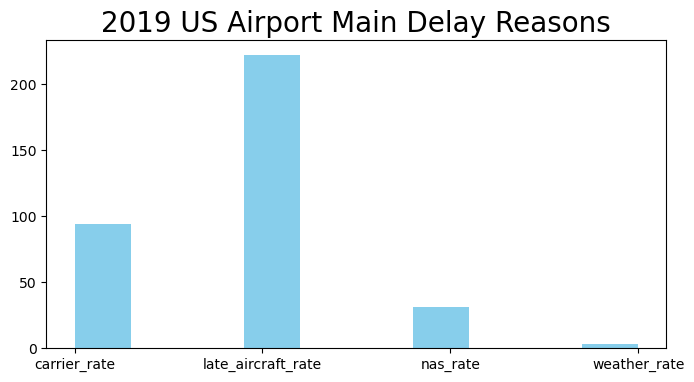

In [59]:
plt.figure(figsize = (8, 4))

plt.hist(df_2019_delay_main_reason['main_reason'], color = 'skyblue')
plt.title('2019 US Airport Main Delay Reasons', fontsize=20)
plt.show()

### **2.1.1 Top 10 airports?**

In [60]:
df_2019_delay_main_reason_10 = df_2019_delay_main_reason.head(10)

df_2019_delay_main_reason_10

,airport_name,arr_flights,delay_rate,main_reason,main_reason_rate
74,"Cody, WY: Yellowstone Regional",2.0,0.500000,carrier_rate,1.000000
341,"Concord, NC: Concord Padgett Regional",129.0,0.418605,late_aircraft_rate,0.555370
265,"Ponce, PR: Mercedita",87.0,0.379310,late_aircraft_rate,0.436667
24,"Phoenix, AZ: Phoenix - Mesa Gateway",543.0,0.360958,late_aircraft_rate,0.475969
73,"Moab, UT: Canyonlands Field",31.0,0.354839,late_aircraft_rate,0.401818
110,"Newark, NJ: Newark Liberty International",11571.0,0.349408,nas_rate,0.643116
241,"North Bend/Coos Bay, OR: Southwest Oregon Regi...",26.0,0.346154,late_aircraft_rate,0.760000
300,"San Francisco, CA: San Francisco International",14038.0,0.334093,nas_rate,0.593495
243,"Owensboro, KY: Owensboro Daviess County Regional",9.0,0.333333,nas_rate,0.356667
45,"Aguadilla, PR: Rafael Hernandez",210.0,0.328571,late_aircraft_rate,0.438261


## **2.2 Year 2020**

### **2.2.1 Main Delay Reasons**

In [61]:
df_2020_delay['main_reason'] = df_2020_delay[['carrier_rate', 'weather_rate', 'nas_rate',
                                              'late_aircraft_rate']].idxmax(axis=1)

df_2020_delay['main_reason_rate'] = df_2020_delay.apply(lambda row: row[row['main_reason']], axis=1)

df_2020_delay_main_reason = df_2020_delay[['airport_name', 'arr_flights', 'delay_rate', 'main_reason', 'main_reason_rate']]

df_2020_delay_main_reason

,airport_name,arr_flights,delay_rate,main_reason,main_reason_rate
9,"Adak Island, AK: Adak",9.0,0.888889,nas_rate,0.51000
58,"Cold Bay, AK: Cold Bay Airport",18.0,0.500000,late_aircraft_rate,0.32000
292,"Deadhorse, AK: Deadhorse Airport",43.0,0.372093,weather_rate,0.48625
5,"Nantucket, MA: Nantucket Memorial",12.0,0.333333,carrier_rate,0.53000
32,"Binghamton, NY: Greater Binghamton/Edwin A. Li...",31.0,0.322581,carrier_rate,0.70000
...,...,...,...,...,...
101,"Eau Claire, WI: Chippewa Valley Regional",62.0,0.016129,carrier_rate,1.00000
4,"Albany, GA: Southwest Georgia Regional",90.0,0.011111,carrier_rate,0.96000
149,"Hobbs, NM: Lea County Regional",23.0,0.000000,carrier_rate,0.00000
243,"Owensboro, KY: Owensboro Daviess County Regional",9.0,0.000000,carrier_rate,0.00000


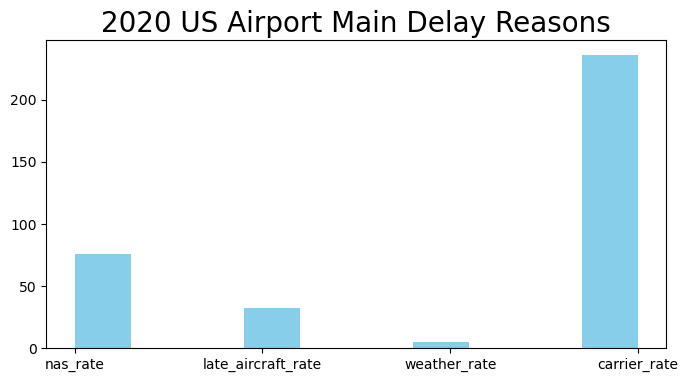

In [62]:
plt.figure(figsize = (8, 4))

plt.hist(df_2020_delay_main_reason['main_reason'], color = 'skyblue')
plt.title('2020 US Airport Main Delay Reasons', fontsize=20)
plt.show()

### **2.2.2 Top 10 airports?**

In [63]:
df_2020_delay_main_reason_10 = df_2020_delay_main_reason.head(10)

df_2020_delay_main_reason_10

,airport_name,arr_flights,delay_rate,main_reason,main_reason_rate
9,"Adak Island, AK: Adak",9.0,0.888889,nas_rate,0.510000
58,"Cold Bay, AK: Cold Bay Airport",18.0,0.500000,late_aircraft_rate,0.320000
292,"Deadhorse, AK: Deadhorse Airport",43.0,0.372093,weather_rate,0.486250
5,"Nantucket, MA: Nantucket Memorial",12.0,0.333333,carrier_rate,0.530000
32,"Binghamton, NY: Greater Binghamton/Edwin A. Li...",31.0,0.322581,carrier_rate,0.700000
19,"Aspen, CO: Aspen Pitkin County Sardy Field",599.0,0.275459,carrier_rate,0.393939
242,"Kotzebue, AK: Ralph Wien Memorial",30.0,0.266667,carrier_rate,0.586250
66,"Sault Ste. Marie, MI: Chippewa County Internat...",61.0,0.262295,carrier_rate,1.000000
37,"Bemidji, MN: Bemidji Regional",62.0,0.258065,carrier_rate,0.750000
268,"Provo, UT: Provo Municipal",52.0,0.250000,nas_rate,0.462308


### Observation 2:

- in 2019, the main delay reason across US airports was "Late Aircraft Delay",

- while in 2020, most of US airport delay was because of "Carriers".

- Duirng covid, there was some carrier changes?

# **3. K-Means clutering**

## **3.1 Year 2019**

In [66]:
df_2019_airports.head()

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",356.0,60.0,22.68,3.82,13.38,0.00,20.13,2.0,...,1559.0,162.0,497.0,0.0,1246.0,0.168539,0.378000,0.063667,0.223000,0.335500
1,ABI,"Abilene, TX: Abilene Regional",195.0,32.0,11.58,0.60,8.79,0.00,11.02,1.0,...,459.0,21.0,257.0,0.0,826.0,0.164103,0.361875,0.018750,0.274687,0.344375
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",2051.0,438.0,164.31,8.41,56.22,0.31,208.76,11.0,...,9254.0,350.0,1889.0,17.0,11136.0,0.213554,0.375137,0.019201,0.128356,0.476621
3,ABR,"Aberdeen, SD: Aberdeen Regional",64.0,15.0,2.94,3.41,4.45,0.00,4.19,2.0,...,153.0,502.0,265.0,0.0,1546.0,0.234375,0.196000,0.227333,0.296667,0.279333
4,ABY,"Albany, GA: Southwest Georgia Regional",81.0,11.0,5.91,1.00,0.71,0.00,3.38,0.0,...,890.0,43.0,39.0,0.0,272.0,0.135802,0.537273,0.090909,0.064545,0.307273


In [67]:
df_2019_airports.columns

Index(['airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_rate', 'carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate'],
      dtype='object')

In [68]:
df_2019_airports['avg_delay_time'] = df_2019_airports['arr_delay']/df_2019_airports['arr_del15']

In [69]:
df_2019_airports[df_2019_airports.isna().any(axis=1)]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate,avg_delay_time
30,BFM,"Mobile, AL: Mobile Downtown",12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
250,PGV,"Greenville, NC: Pitt Greenville",2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [71]:
df_2019_airports = df_2019_airports.fillna(0.0)

In [73]:
features = ['arr_flights', 'delay_rate', 'avg_delay_time']

X = df_2019_airports[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
errors = []
silhouette_scores = []

cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    errors.append(kmeans.inertia_)
   
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)
   
    print(f"K = {k} error = {kmeans.inertia_:.2f} Silhouette Score = {sil_score:.4f}")


K = 2 error = 782.97 Silhouette Score = 0.5411
K = 3 error = 566.41 Silhouette Score = 0.4906
K = 4 error = 408.56 Silhouette Score = 0.3321
K = 5 error = 331.38 Silhouette Score = 0.3646
K = 6 error = 287.55 Silhouette Score = 0.3712
K = 7 error = 245.50 Silhouette Score = 0.3774
K = 8 error = 218.60 Silhouette Score = 0.3026
K = 9 error = 193.87 Silhouette Score = 0.3310


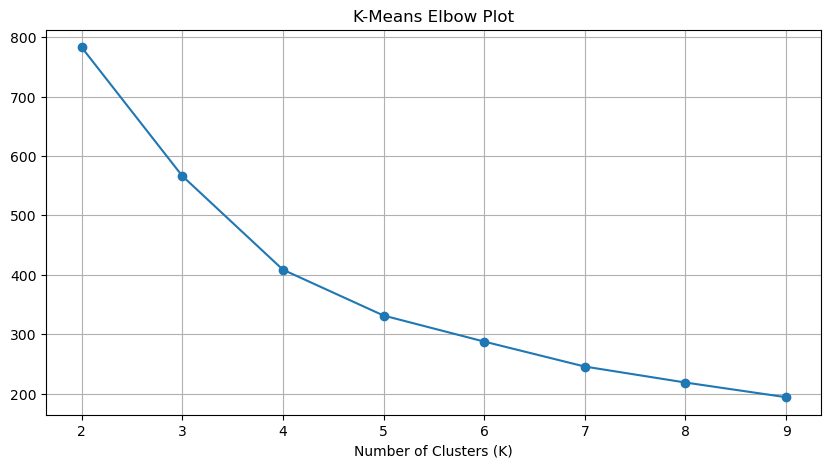

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(cluster_range, errors, marker='o')

plt.title('K-Means Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.grid()
plt.show()

Try 2 clusters

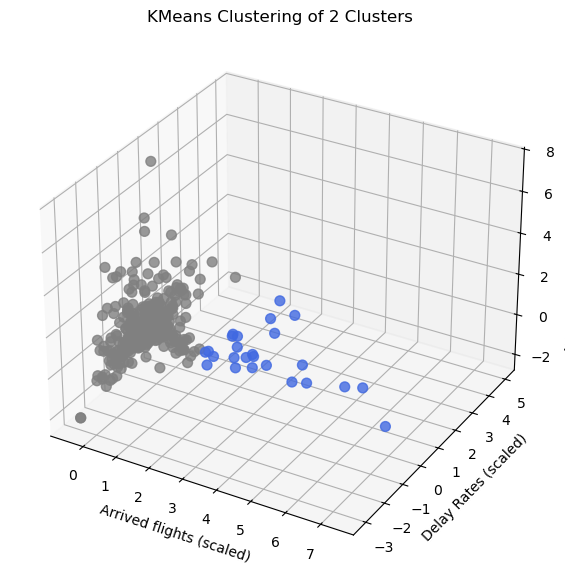

In [78]:
kmeans_cluster2 = KMeans(n_clusters=2, random_state=42)
labels = kmeans_cluster2.fit_predict(X_scaled)

# 3D plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
x = X_scaled[:, 0] 
y = X_scaled[:, 1] 
z = X_scaled[:, 2]

color_map = {0: 'grey', 1: 'royalblue'}
colors = [color_map[label] for label in labels]
scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)

ax.set_xlabel("Arrived flights (scaled)")
ax.set_ylabel("Delay Rates (scaled)")
ax.set_zlabel("Average Delay Time (scaled)")
ax.set_title("KMeans Clustering of 2 Clusters")
plt.show()

Try 3 clusters

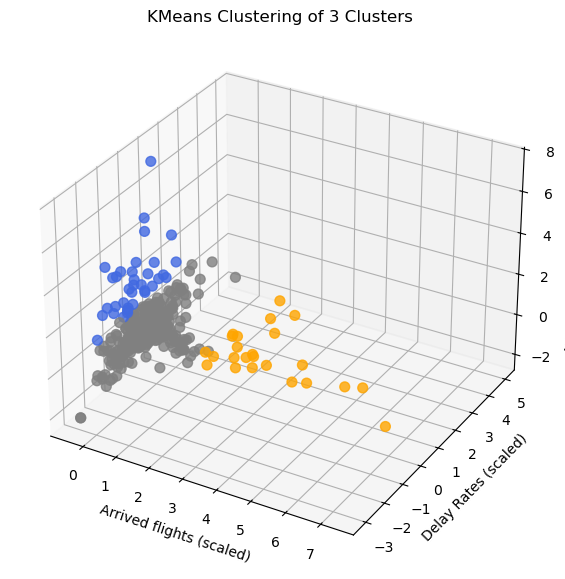

In [86]:
kmeans_cluster3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_cluster3.fit_predict(X_scaled)

# 3D plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
x = X_scaled[:, 0] 
y = X_scaled[:, 1] 
z = X_scaled[:, 2]

color_map = {0: 'grey', 1: 'royalblue', 2: 'orange'}
colors = [color_map[labels] for labels in labels_3]
scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)

ax.set_xlabel("Arrived flights (scaled)")
ax.set_ylabel("Delay Rates (scaled)")
ax.set_zlabel("Average Delay Time (scaled)")
ax.set_title("KMeans Clustering of 3 Clusters")
plt.show()

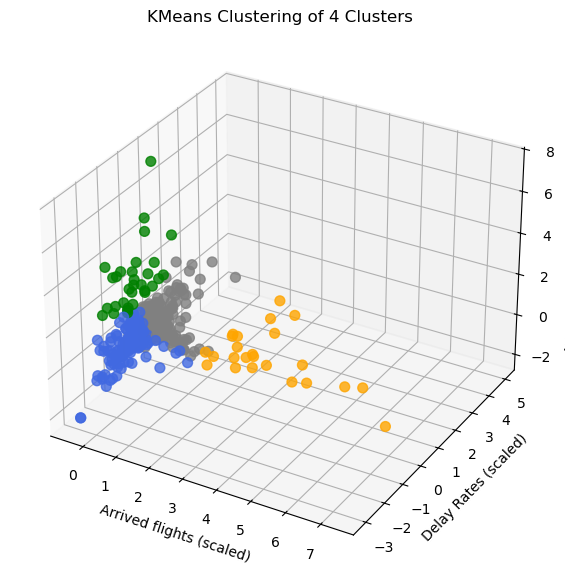

In [ ]:
kmeans_cluster4 = KMeans(n_clusters=4, random_state=42)
labels = kmeans_cluster4.fit_predict(X_scaled)

# 3D plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
x = X_scaled[:, 0] 
y = X_scaled[:, 1] 
z = X_scaled[:, 2]

color_map = {0: 'grey', 1: 'royalblue', 2: 'orange', 3: 'green'}
colors = [color_map[label] for label in labels]
scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)

ax.set_xlabel("Arrived flights (scaled)")
ax.set_ylabel("Delay Rates (scaled)")
ax.set_zlabel("Average Delay Time (scaled)")
ax.set_title("KMeans Clustering of 4 Clusters")
plt.show()

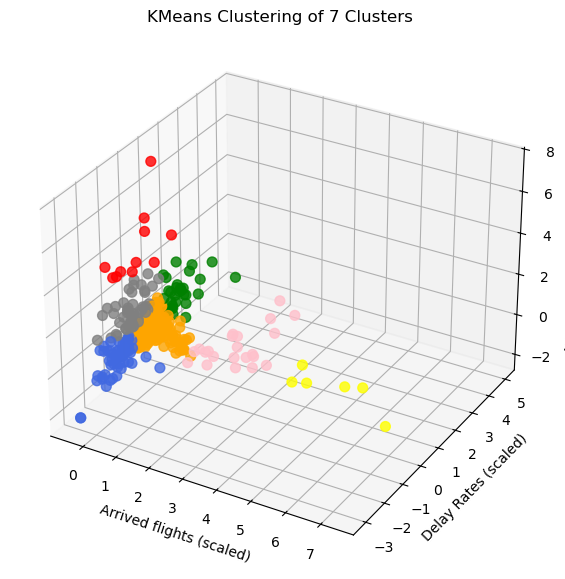

In [ ]:
kmeans_cluster7 = KMeans(n_clusters=7, random_state=42)
labels = kmeans_cluster7.fit_predict(X_scaled)

# 3D plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
x = X_scaled[:, 0] 
y = X_scaled[:, 1] 
z = X_scaled[:, 2]

color_map = {0: 'grey', 1: 'royalblue', 2: 'orange', 3: 'green', 4: 'pink', 5:'red', 6:'yellow'}
colors = [color_map[label] for label in labels]
scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)

ax.set_xlabel("Arrived flights (scaled)")
ax.set_ylabel("Delay Rates (scaled)")
ax.set_zlabel("Average Delay Time (scaled)")
ax.set_title("KMeans Clustering of 7 Clusters")
plt.show()

clusters = 3

In [87]:
df_2019_airports['cluster'] = labels_3

cluster_counts = df_2019_airports['cluster'].value_counts()

cluster_counts

cluster
0    291
1     35
2     24
Name: count, dtype: int64

In [88]:
df_2019_airports.columns

Index(['airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'delay_rate', 'carrier_rate', 'weather_rate', 'nas_rate',
       'late_aircraft_rate', 'avg_delay_time', 'cluster'],
      dtype='object')

In [89]:
df_2019_airports = df_2019_airports[['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate', 'avg_delay_time', 'cluster']]

df_2019_airport_cluster2 = df_2019_airports[df_2019_airports.cluster == 1]
df_2019_airport_cluster3 = df_2019_airports[df_2019_airports.cluster == 2]

In [92]:
df_2019_airport_cluster1 = df_2019_airports[df_2019_airports.cluster == 0]

In [90]:
df_2019_airport_cluster2

,airport,airport_name,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
3,ABR,"Aberdeen, SD: Aberdeen Regional",64.0,15.0,0.234375,164.400000,1
4,ABY,"Albany, GA: Southwest Georgia Regional",81.0,11.0,0.135802,113.090909,1
16,APN,"Alpena, MI: Alpena County Regional",53.0,11.0,0.207547,229.909091,1
28,BFF,"Scottsbluff, NE: Western Neb. Regional/William...",53.0,8.0,0.150943,122.000000,1
43,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",79.0,7.0,0.088608,150.142857,1
44,BQK,"Brunswick, GA: Brunswick Golden Isles",89.0,10.0,0.112360,142.500000,1
46,BRD,"Brainerd, MN: Brainerd Lakes Regional",54.0,9.0,0.166667,178.000000,1
58,CDC,"Cedar City, UT: Cedar City Regional",53.0,3.0,0.056604,109.333333,1
60,CGI,"Cape Girardeau, MO: Cape Girardeau Regional",55.0,9.0,0.163636,143.777778,1
66,CKB,"Clarksburg/Fairmont, WV: North Central West Vi...",73.0,18.0,0.246575,130.277778,1


In [91]:
df_2019_airport_cluster3

,airport,airport_name,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
18,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",32314.0,4317.0,0.133595,62.514709,2
42,BOS,"Boston, MA: Logan International",12568.0,3664.0,0.291534,89.901747,2
54,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",9051.0,1573.0,0.173793,48.346472,2
69,CLT,"Charlotte, NC: Charlotte Douglas International",19722.0,3380.0,0.171382,65.525740,2
88,DCA,"Washington, DC: Ronald Reagan Washington National",11238.0,2429.0,0.216142,69.093866,2
89,DEN,"Denver, CO: Denver International",21332.0,3761.0,0.176308,68.224674,2
90,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",25505.0,4814.0,0.188747,73.803698,2
96,DTW,"Detroit, MI: Detroit Metro Wayne County",13697.0,2009.0,0.146674,76.309109,2
110,EWR,"Newark, NJ: Newark Liberty International",11571.0,4043.0,0.349408,90.961167,2
118,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",9308.0,2346.0,0.252041,67.060529,2


In [93]:
df_2019_airport_cluster1.describe()

,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
count,291.000000,291.000000,291.000000,291.000000,291.0
mean,900.415808,177.800687,0.190588,65.468686,0.0
std,1448.181605,281.981856,0.062348,18.292416,0.0
min,2.000000,0.000000,0.000000,0.000000,0.0
25%,98.500000,17.000000,0.159033,54.375531,0.0
50%,305.000000,60.000000,0.192029,63.916667,0.0
75%,910.500000,192.500000,0.221901,76.825000,0.0
max,7738.000000,1638.000000,0.500000,108.000000,0.0


In [94]:
df_2019_airport_cluster2.describe()

,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,82.657143,14.342857,0.172972,158.967533,1.0
std,39.061748,7.959245,0.061709,47.125718,0.0
min,53.000000,3.000000,0.056604,109.333333,1.0
25%,56.000000,9.000000,0.133939,128.323099,1.0
50%,70.000000,11.000000,0.166667,143.777778,1.0
75%,89.000000,19.000000,0.210515,183.000000,1.0
max,197.000000,36.000000,0.303030,339.703704,1.0


In [95]:
df_2019_airport_cluster3.describe()

,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
count,24.00000,24.000000,24.000000,24.000000,24.0
mean,15035.37500,3112.625000,0.214647,70.155497,2.0
std,6182.17405,1092.874185,0.055405,10.339807,0.0
min,8389.00000,1559.000000,0.133595,48.346472,2.0
25%,11043.75000,2340.750000,0.173190,62.493954,2.0
50%,13157.00000,2864.000000,0.209396,69.928473,2.0
75%,16219.25000,3837.500000,0.237813,76.245027,2.0
max,32314.00000,5379.000000,0.349408,90.961167,2.0


### Summary：

- cluster 1： Low traffic and moderate delays
- cluster 2:  very low traffic, but severe delay time
- cluster 3:  Big hubs, moderate delay time and rate

## **3.2 Year 2020**

In [97]:
df_2020_airports['avg_delay_time'] = df_2020_airports['arr_delay']/df_2020_airports['arr_del15']

In [100]:
df_2020_airports[df_2020_airports.isna().any(axis=1)]

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_rate,weather_rate,nas_rate,late_aircraft_rate,avg_delay_time
149,HOB,"Hobbs, NM: Lea County Regional",23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
243,OWB,"Owensboro, KY: Owensboro Daviess County Regional",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
324,SWF,"Newburgh/Poughkeepsie, NY: New York Stewart In...",26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [104]:
df_2020_airports = df_2020_airports.fillna(0.0)

In [105]:
features = ['arr_flights', 'delay_rate', 'avg_delay_time']

X = df_2020_airports[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
errors = []
silhouette_scores = []

cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    errors.append(kmeans.inertia_)
   
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)
   
    print(f"K = {k} error = {kmeans.inertia_:.2f} Silhouette Score = {sil_score:.4f}")


K = 2 error = 797.66 Silhouette Score = 0.6587
K = 3 error = 590.63 Silhouette Score = 0.6775
K = 4 error = 445.98 Silhouette Score = 0.6864
K = 5 error = 345.96 Silhouette Score = 0.3837
K = 6 error = 282.11 Silhouette Score = 0.4088
K = 7 error = 223.93 Silhouette Score = 0.3612
K = 8 error = 179.60 Silhouette Score = 0.3410
K = 9 error = 152.34 Silhouette Score = 0.3678


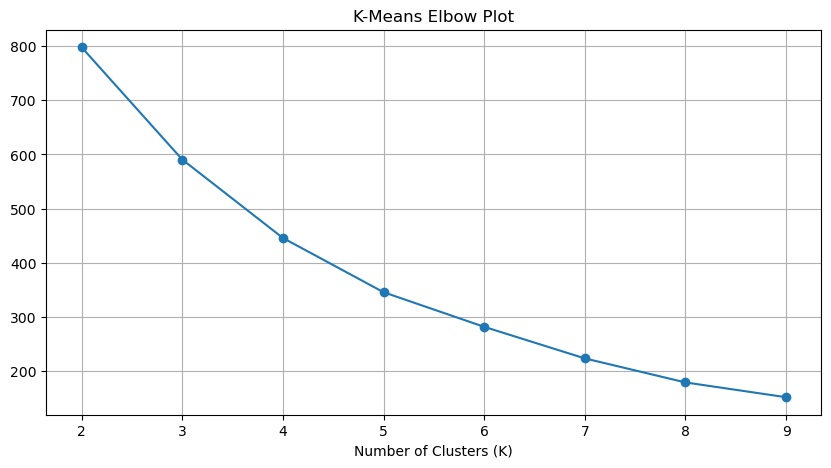

In [107]:
plt.figure(figsize=(10, 5))

plt.plot(cluster_range, errors, marker='o')

plt.title('K-Means Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.grid()
plt.show()

k = 4

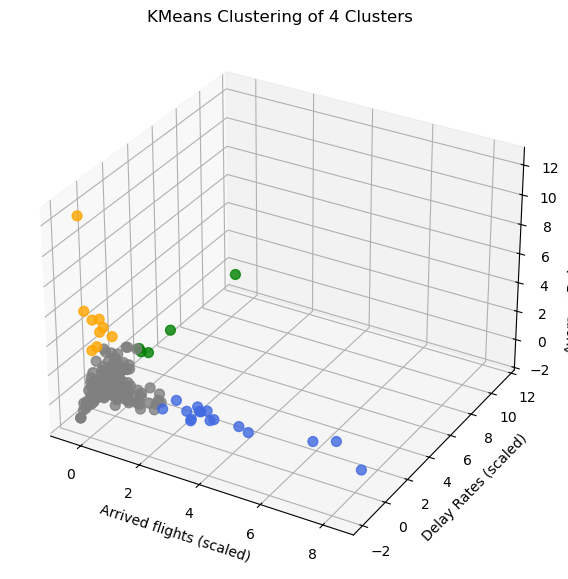

In [108]:
kmeans_cluster4 = KMeans(n_clusters=4, random_state=42)
labels = kmeans_cluster4.fit_predict(X_scaled)

# 3D plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
x = X_scaled[:, 0] 
y = X_scaled[:, 1] 
z = X_scaled[:, 2]

color_map = {0: 'grey', 1: 'royalblue', 2: 'orange', 3: 'green'}
colors = [color_map[label] for label in labels]
scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)

ax.set_xlabel("Arrived flights (scaled)")
ax.set_ylabel("Delay Rates (scaled)")
ax.set_zlabel("Average Delay Time (scaled)")
ax.set_title("KMeans Clustering of 4 Clusters")
plt.show()

Well-seperated!! 

In [109]:
df_2020_airports['cluster'] = labels

cluster_counts = df_2020_airports['cluster'].value_counts()

cluster_counts

cluster
0    319
1     16
2      9
3      5
Name: count, dtype: int64

In [110]:
df_2020_airports = df_2020_airports[['airport', 'airport_name', 'arr_flights', 'arr_del15', 'delay_rate', 'avg_delay_time', 'cluster']]

df_2020_airport_cluster1 = df_2020_airports[df_2020_airports.cluster == 0]
df_2020_airport_cluster2 = df_2020_airports[df_2020_airports.cluster == 1]
df_2020_airport_cluster3 = df_2020_airports[df_2020_airports.cluster == 2]
df_2020_airport_cluster4 = df_2020_airports[df_2020_airports.cluster == 3]

In [111]:
df_2020_airport_cluster1.describe()

,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
count,319.000000,319.000000,319.000000,319.000000,319.0
mean,596.836991,69.075235,0.118099,55.795325,0.0
std,1009.648297,117.462776,0.045704,24.690827,0.0
min,7.000000,0.000000,0.000000,0.000000,0.0
25%,61.000000,8.000000,0.090909,40.864766,0.0
50%,201.000000,21.000000,0.114754,49.930131,0.0
75%,547.500000,73.000000,0.141543,64.594318,0.0
max,5455.000000,706.000000,0.275459,176.428571,0.0


In [112]:
df_2020_airport_cluster2

,airport,airport_name,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
20,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23124.0,2237.0,0.096739,57.354493,1
70,CLT,"Charlotte, NC: Charlotte Douglas International",13594.0,1193.0,0.087759,70.774518,1
91,DEN,"Denver, CO: Denver International",18173.0,2808.0,0.154515,59.338675,1
92,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",19751.0,3634.0,0.183991,62.673913,1
98,DTW,"Detroit, MI: Detroit Metro Wayne County",9399.0,1173.0,0.124801,73.142370,1
120,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",6146.0,958.0,0.155874,52.491649,1
158,IAH,"Houston, TX: George Bush Intercontinental/Houston",7638.0,923.0,0.120843,51.809317,1
180,LAS,"Las Vegas, NV: McCarran International",8528.0,774.0,0.090760,52.391473,1
182,LAX,"Los Angeles, CA: Los Angeles International",10062.0,997.0,0.099086,61.655968,1
204,MCO,"Orlando, FL: Orlando International",8648.0,1178.0,0.136216,53.925297,1


In [113]:
df_2020_airport_cluster3

,airport,airport_name,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
46,BRD,"Brainerd, MN: Brainerd Lakes Regional",53.0,7.0,0.132075,253.714286,2
84,CYS,"Cheyenne, WY: Cheyenne Regional/Jerry Olson Field",31.0,3.0,0.096774,203.666667,2
134,GRI,"Grand Island, NE: Central Nebraska Regional",80.0,6.0,0.075000,311.166667,2
146,HIB,"Hibbing, MN: Range Regional",53.0,6.0,0.113208,247.166667,2
157,IAG,"Niagara Falls, NY: Niagara Falls International",27.0,1.0,0.037037,362.000000,2
181,LAW,"Lawton/Fort Sill, OK: Lawton-Fort Sill Regional",68.0,12.0,0.176471,197.083333,2
199,LWS,"Lewiston, ID: Lewiston Nez Perce County",73.0,5.0,0.068493,206.000000,2
277,RIW,"Riverton/Lander, WY: Riverton Regional",45.0,1.0,0.022222,699.000000,2
340,VCT,"Victoria, TX: Victoria Regional",53.0,6.0,0.113208,293.333333,2


In [114]:
df_2020_airport_cluster4

,airport,airport_name,arr_flights,arr_del15,delay_rate,avg_delay_time,cluster
5,ACK,"Nantucket, MA: Nantucket Memorial",12.0,4.0,0.333333,55.5000,3
9,ADK,"Adak Island, AK: Adak",9.0,8.0,0.888889,49.8750,3
32,BGM,"Binghamton, NY: Greater Binghamton/Edwin A. Li...",31.0,10.0,0.322581,73.5000,3
58,CDB,"Cold Bay, AK: Cold Bay Airport",18.0,9.0,0.500000,45.0000,3
292,SCC,"Deadhorse, AK: Deadhorse Airport",43.0,16.0,0.372093,31.3125,3


Summary:

1. cluster 1:  mid-sized airports and moderate delay
2. Cluster 2:  Major hubs with high traffic while manageable delays
3. cluster 3:  low traffic, but very high average delay time: when delays do occur, they are extremely long
4. Cluster 4： Extremely low traffic， high delay rate, remote places?